In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Chargement des données
chemin_fichier = "WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv"
df = pd.read_csv(chemin_fichier)

In [3]:
# Affichage des premières lignes
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
# Vérification des valeurs manquantes
valeurs_manquantes = df.isnull().sum()
print("Valeurs manquantes par colonne :\n", valeurs_manquantes)

Valeurs manquantes par colonne :
 Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64


In [5]:
# Vérification des types de données
types_donnees = df.dtypes
print("\nTypes de données :\n", types_donnees)


Types de données :
 Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      ob

In [6]:
# Analyse des statistiques descriptives
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


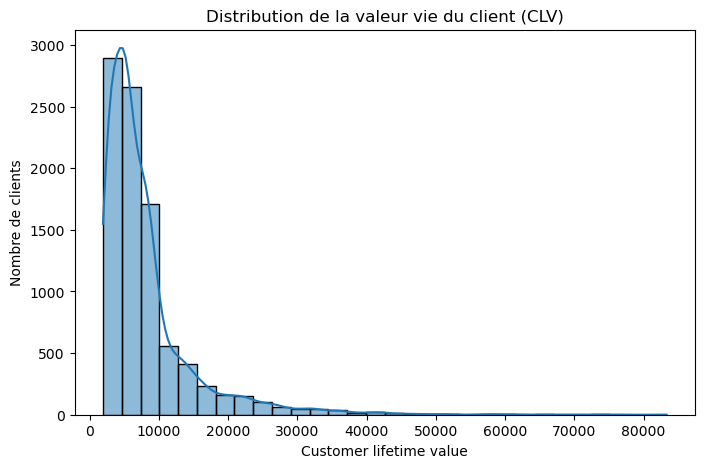

In [7]:
# Visualisation de la distribution de la valeur vie du client (CLV)
plt.figure(figsize=(8, 5))
sns.histplot(df['Customer Lifetime Value'], bins=30, kde=True)
plt.title("Distribution de la valeur vie du client (CLV)")
plt.xlabel("Customer lifetime value")
plt.ylabel("Nombre de clients")
plt.show()

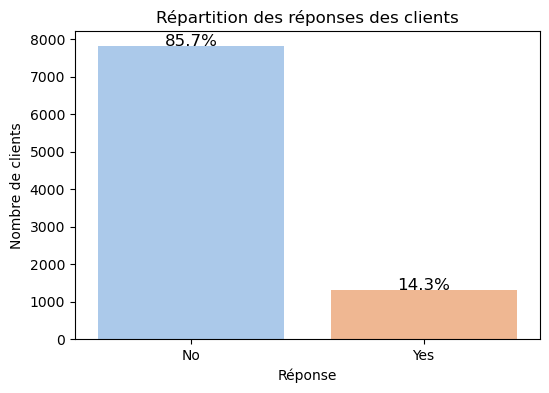

In [8]:
# Visualisation du Response Rate avec nombre et pourcentage
response_counts = df['Response'].value_counts()
response_percentages = df['Response'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=response_counts.index, y=response_counts.values, palette='pastel')
plt.title("Répartition des réponses des clients")
plt.xlabel("Réponse")
plt.ylabel("Nombre de clients")

# Ajouter les pourcentages sur les barres
for i, (count, percent) in enumerate(zip(response_counts.values, response_percentages.values)):
    ax.text(i, count + 1, f"{percent:.1f}%", ha='center', fontsize=12)

plt.show()

<Figure size 800x500 with 0 Axes>

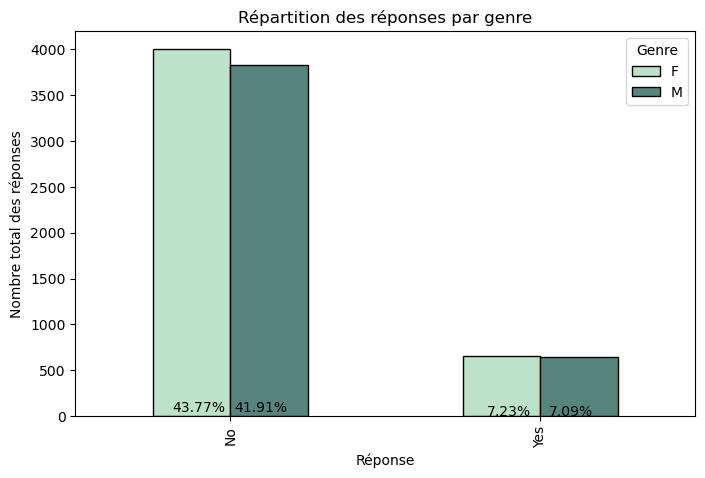

In [9]:
# Répartition des hommes et femmes en fonction de chaque réponse
plt.figure(figsize=(8, 5))
gender_response_counts = df.groupby(['Response', 'Gender']).size().unstack()
total_responses = df.shape[0]
gender_response_counts_norm = (gender_response_counts / total_responses) * 100

gender_response_counts.plot(kind='bar', figsize=(8, 5), color=["#BCE2C9", "#56857D"], edgecolor="black")
plt.title("Répartition des réponses par genre")
plt.xlabel("Réponse")
plt.ylabel("Nombre total des réponses")
plt.legend(title="Genre")

# Ajout des pourcentages sur les barres
for i, response in enumerate(gender_response_counts.index):
    for j, gender in enumerate(gender_response_counts.columns):
        percent = gender_response_counts_norm.loc[response, gender]
        plt.text(i + (j * 0.2) - 0.1, percent + 0.5, f"{percent:.2f}%", ha='center', fontsize=10)

plt.show()

<Figure size 800x500 with 0 Axes>

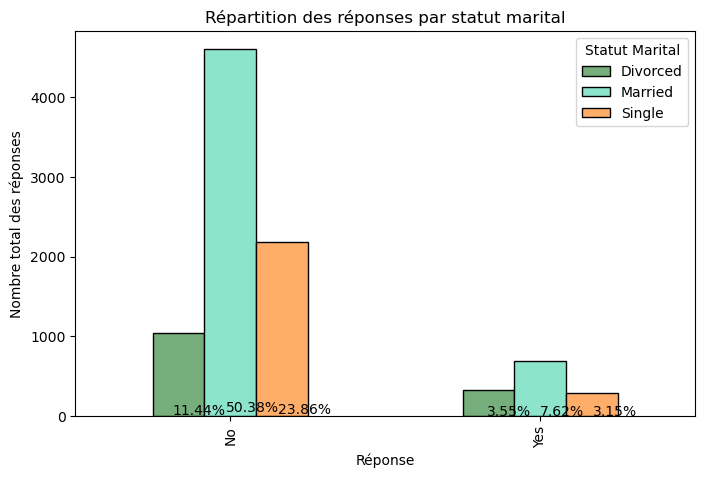

In [10]:
# Répartition du Response Rate par statut marital
plt.figure(figsize=(8, 5))
marital_response_counts = df.groupby(['Response', 'Marital Status']).size().unstack()
total_responses = df.shape[0]
marital_response_counts_norm = (marital_response_counts / total_responses) * 100

marital_response_counts.plot(kind='bar', figsize=(8, 5), color=["#76AF7B", "#8CE5CB", "#FFAE6A"], edgecolor="black")
plt.title("Répartition des réponses par statut marital")
plt.xlabel("Réponse")
plt.ylabel("Nombre total des réponses")
plt.legend(title="Statut Marital")

# Ajouter les pourcentages sur les barres
for i, response in enumerate(marital_response_counts.index):
    for j, status in enumerate(marital_response_counts.columns):
        percent = marital_response_counts_norm.loc[response, status]
        plt.text(i + (j * 0.17) - 0.1, percent + 0.5, f"{percent:.2f}%", ha='center', fontsize=10)

plt.show()

<Figure size 800x500 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values


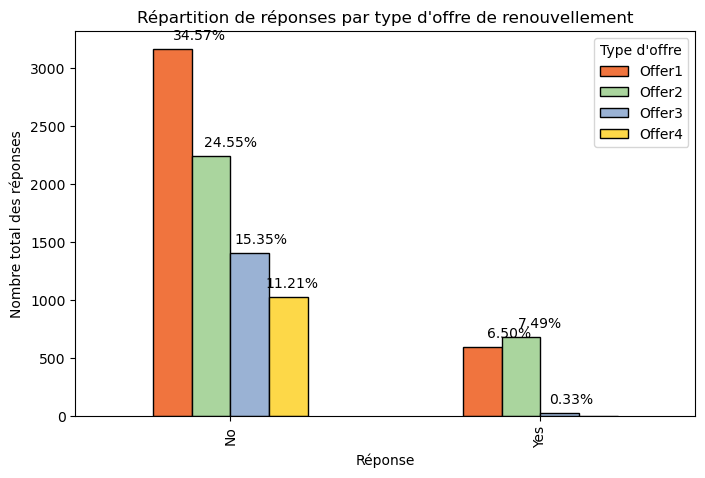

In [11]:
# Répartition du response rate par type d'offre de renouvellement avec correction du placement des pourcentages
plt.figure(figsize=(8, 5))
renew_offer_counts = df.groupby(['Response', 'Renew Offer Type']).size().unstack()
total_responses = df.shape[0]
renew_offer_counts_norm = (renew_offer_counts / total_responses) * 100

ax = renew_offer_counts.plot(kind='bar', figsize=(8, 5), color=["#F0743E", "#AAD59E", "#9AB2D4", "#FDD848"], edgecolor="black")
plt.title("Répartition de réponses par type d'offre de renouvellement")
plt.xlabel("Réponse")
plt.ylabel("Nombre total des réponses")
plt.legend(title="Type d'offre")

# Ajout des pourcentages au-dessus des barres
for i, response in enumerate(renew_offer_counts.index):
    for j, offer in enumerate(renew_offer_counts.columns):
        percent = renew_offer_counts_norm.loc[response, offer]
        plt.text(i + (j * 0.10) - 0.1, renew_offer_counts.loc[response, offer] + 80, f"{percent:.2f}%", ha='center', fontsize=10)

plt.show()

<Figure size 800x500 with 0 Axes>

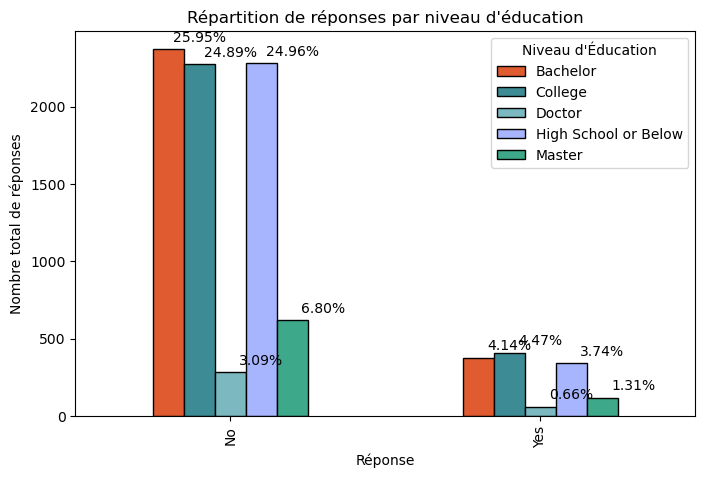

In [12]:
# Répartition du response rate par niveau d'éducation 
plt.figure(figsize=(8, 5))
education_response_counts = df.groupby(['Response', 'Education']).size().unstack()
total_responses = df.shape[0]
education_response_counts_norm = (education_response_counts / total_responses) * 100

ax = education_response_counts.plot(kind='bar', figsize=(8, 5), color=["#E15B31", "#3D8C95", "#7BB8C0", "#A7B5FE", "#3EA88A"], edgecolor="black")
plt.title("Répartition de réponses par niveau d'éducation")
plt.xlabel("Réponse")
plt.ylabel("Nombre total de réponses")
plt.legend(title="Niveau d'Éducation")

# Ajout des pourcentages sur les barres
for i, response in enumerate(education_response_counts.index):
    for j, education in enumerate(education_response_counts.columns):
        percent = education_response_counts_norm.loc[response, education]
        plt.text(i + (j * 0.10) - 0.1, education_response_counts.loc[response, education] + 50, f"{percent:.2f}%", ha='center', fontsize=10)

plt.show()

<Figure size 800x500 with 0 Axes>

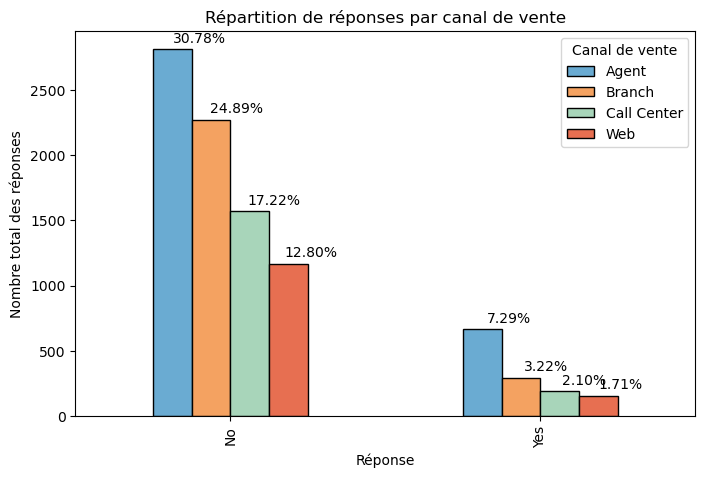

In [13]:
# Répartition du response rate par Sales Channel 
plt.figure(figsize=(8, 5))
sales_channel_counts = df.groupby(['Response', 'Sales Channel']).size().unstack()
total_responses = df.shape[0]
sales_channel_counts_norm = (sales_channel_counts / total_responses) * 100

ax = sales_channel_counts.plot(kind='bar', figsize=(8, 5), color=["#6AABD2", "#F4A261", "#A8D5BA", "#E76F51"], edgecolor="black")
plt.title("Répartition de réponses par canal de vente")
plt.xlabel("Réponse")
plt.ylabel("Nombre total des réponses")
plt.legend(title="Canal de vente")

# Ajout des pourcentages sur les barres
for i, response in enumerate(sales_channel_counts.index):
    for j, channel in enumerate(sales_channel_counts.columns):
        percent = sales_channel_counts_norm.loc[response, channel]
        plt.text(i + (j * 0.12) - 0.1, sales_channel_counts.loc[response, channel] + 50, f"{percent:.2f}%", ha='center', fontsize=10)

plt.show()

<Figure size 1200x600 with 0 Axes>

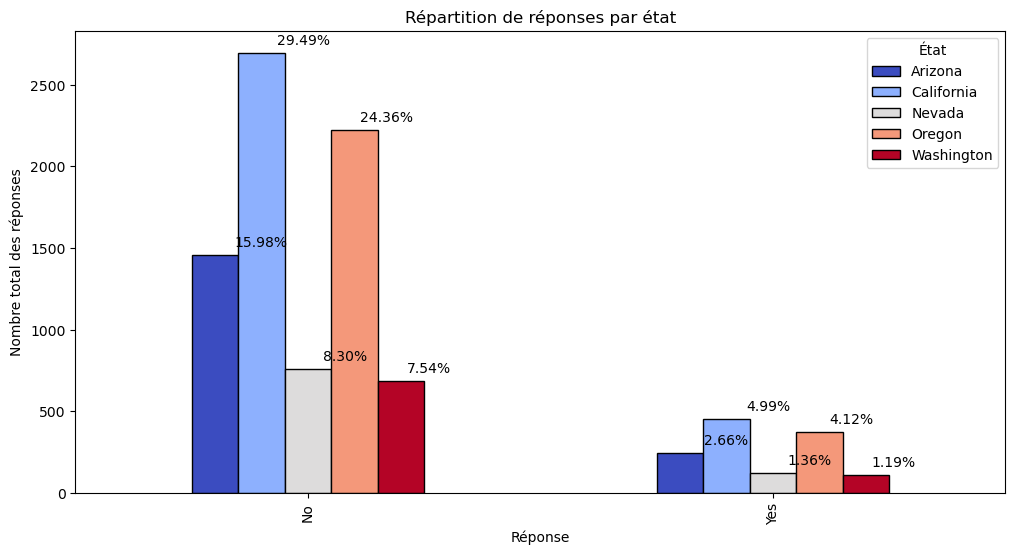

In [14]:
# Répartition du response rate par État avec correction des pourcentages
plt.figure(figsize=(12, 6))
state_counts = df.groupby(['Response', 'State']).size().unstack()
total_responses = df.shape[0]
state_counts_norm = (state_counts / total_responses) * 100

ax = state_counts.plot(kind='bar', figsize=(12, 6), colormap='coolwarm', edgecolor="black")
plt.title("Répartition de réponses par état")
plt.xlabel("Réponse")
plt.ylabel("Nombre total des réponses")
plt.legend(title="État")

# Ajout des pourcentages sur les barres
for i, response in enumerate(state_counts.index):
    for j, state in enumerate(state_counts.columns):
        percent = state_counts_norm.loc[response, state]
        plt.text(i + (j * 0.09) - 0.1, state_counts.loc[response, state] + 50, f"{percent:.2f}%", ha='center', fontsize=10)

plt.show()

In [15]:
# Analyse par canal de vente
# Calcul des agrégations par Sales Channel
calcul_agg = df.groupby("Sales Channel").agg(
    Total_Customers=("Customer", "count"),
    Sum_CLV=("Customer Lifetime Value", "sum"),
    Total_Premium=("Monthly Premium Auto", "sum"),
    Total_Claim_Amount=("Total Claim Amount", "sum")
).reset_index()

# Calcul des totaux globaux
total_row = pd.DataFrame({
    "Sales Channel": ["Total"],
    "Total_Customers": [df["Customer"].count()],
    "Sum_CLV": [df["Customer Lifetime Value"].sum()],
    "Total_Premium": [df["Monthly Premium Auto"].sum()],
    "Total_Claim_Amount": [df["Total Claim Amount"].sum()]
})

# Ajouter la ligne des totaux globaux au tableau final
calcul_agg = pd.concat([calcul_agg, total_row], ignore_index=True)

# Désactiver la notation scientifique
pd.set_option('display.float_format', '{:.2f}'.format)
# Afficher le tableau
display(calcul_agg)

,Sales Channel,Total_Customers,Sum_CLV,Total_Premium,Total_Claim_Amount
0,Agent,3477,27668955.42,325722,1524437.36
1,Branch,2567,20843300.35,239519,1111169.08
2,Call Center,1765,14296651.35,163231,755639.96
3,Web,1325,10308219.18,122993,573720.65
4,Total,9134,73117126.30,851465,3964967.05


In [16]:
# Calcul des KPIs
# 1. Taux de conversion (CR)
nombre_total_clients = df.shape[0]
nombre_clients_converts = df[df["Response"] == "Yes"].shape[0]
taux_conversion = (nombre_clients_converts / nombre_total_clients) * 100
print(f"Taux de conversion (CR) : {taux_conversion:.2f}%")

Taux de conversion (CR) : 14.32%


In [17]:
# 2. Coût par Lead (CPL) - Hypothèse d'un budget marketing total
# Compte tenu que la somme minimum de premium pour un canal est environ 100000, on suppose un budget de 4x100000=400000
cout_marketing_total = 400000
CPL = cout_marketing_total / nombre_total_clients
print(f"Coût par Lead (CPL) : {CPL:.2f} unités monétaires")

Coût par Lead (CPL) : 43.79 unités monétaires


In [18]:
# 3. Coût par Acquisition (CPA) - On suppose que chaque lead devient un client
CPA = cout_marketing_total / nombre_clients_converts
print(f"Coût par Acquisition (CPA) : {CPA:.2f} unités monétaires")

Coût par Acquisition (CPA) : 305.81 unités monétaires


In [19]:
# 4. Valeur Vie du Client (CLV) par client
valeur_vie_client_moyenne = df["Customer Lifetime Value"].mean()
print(f"Valeur Vie du Client (CLV) moyenne : {valeur_vie_client_moyenne:.2f} unités monétaires")

Valeur Vie du Client (CLV) moyenne : 8004.94 unités monétaires


In [20]:
# 5. Taux de Rétention (CRR)
nombre_clients_fideles = df[df["Number of Policies"] > 1].shape[0]
taux_retention = (nombre_clients_fideles / nombre_total_clients) * 100
print(f"Taux de Rétention (CRR) : {taux_retention:.2f}%")

Taux de Rétention (CRR) : 64.41%


In [21]:
# 6. Taux d'Attrition (CCR)
taux_attrition = 100 - taux_retention
print(f"Taux d'Attrition (CCR) : {taux_attrition:.2f}%")

Taux d'Attrition (CCR) : 35.59%


In [22]:
# 7. Retour sur Investissement (ROI)
revenu_total = df["Monthly Premium Auto"].sum()
ROI = ((revenu_total - cout_marketing_total) / cout_marketing_total) * 100
print(f"Retour sur Investissement (ROI) : {ROI:.2f}%")

Retour sur Investissement (ROI) : 112.87%


In [23]:
# 8. Score NPS - Basé sur CLV
Q1 = df["Customer Lifetime Value"].quantile(0.25)
Q3 = df["Customer Lifetime Value"].quantile(0.75)
promoteurs = df[df["Customer Lifetime Value"] > Q3].shape[0]
detracteurs = df[df["Customer Lifetime Value"] < Q1].shape[0]
nombre_total_repondants = df.shape[0]
NPS = ((promoteurs - detracteurs) / nombre_total_repondants) * 100
print(f"Score NPS (Net Promoter Score) : {NPS:.2f}%")

Score NPS (Net Promoter Score) : 0.00%


C:\Users\micht\AppData\Local\Temp\ipykernel_21532\1128849376.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(noms_kpi, rotation=30, ha="right")


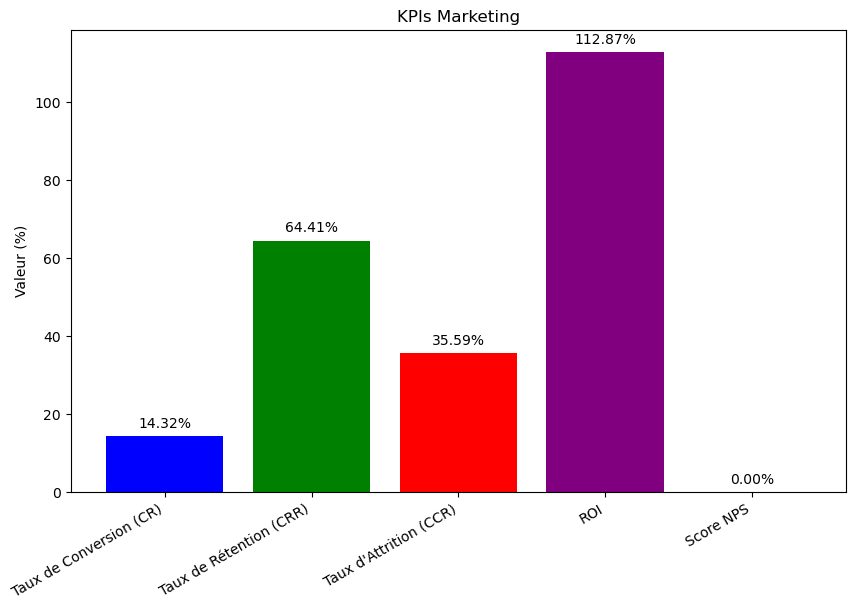

In [24]:
# Visualisation des KPIs
fig, ax = plt.subplots(figsize=(10,6))

# Normalisation pour éviter des écarts trop grands (ex: ROI)
valeurs_kpi = [taux_conversion, taux_retention, taux_attrition, ROI, NPS]
noms_kpi = ["Taux de Conversion (CR)", "Taux de Rétention (CRR)", "Taux d'Attrition (CCR)", "ROI", "Score NPS"]

# Tracé des KPIs sous forme de barres
ax.bar(noms_kpi, valeurs_kpi, color=['blue', 'green', 'red', 'purple', 'orange'])

# Ajout des valeurs sur les barres
for i, v in enumerate(valeurs_kpi):
    ax.text(i, v + max(valeurs_kpi)*0.02, f"{v:.2f}%", ha='center', fontsize=10)

# Ajustements du graphique
ax.set_ylabel("Valeur (%)")
ax.set_title("KPIs Marketing")
ax.set_xticklabels(noms_kpi, rotation=30, ha="right")

# Affichage du graphique
plt.show()

In [25]:
# Calcul des KPIs par canal de vente
# Compte tenu que la somme minimum de premium pour un canal est environ 100000, on suppose donc un budget 100000 pour chacun
cout_marketing_canal = 100000
kpi_resultats = df.groupby("Sales Channel").agg(
    Total_Customers=("Customer", "count"),
    Avg_CLV=("Customer Lifetime Value", "mean"),
    Total_Premium=("Monthly Premium Auto", "sum"),
    Conversion_Rate=("Response", lambda x: (x == "Yes").mean() * 100),  # % de clients ayant répondu "Yes"
).reset_index()

# Calculs supplémentaires : CPL, CPA, CRR, CCR, ROI
kpi_resultats["CPL"] = cout_marketing_canal / kpi_resultats["Total_Customers"]
kpi_resultats["CPA"] = cout_marketing_canal / (kpi_resultats["Conversion_Rate"] / 100 * kpi_resultats["Total_Customers"])

# Calcul du Taux de Rétention (CRR) par canal
def calculate_crr_by_channel(df):
    """Calcul du taux de rétention (CRR) pour chaque canal"""
    retention_per_channel = df.groupby("Sales Channel").apply(
        lambda x: (x[x["Number of Policies"] > 1].shape[0] / x.shape[0]) * 100
    ).reset_index(name="CRR")
    return retention_per_channel

retention_rates = calculate_crr_by_channel(df)
kpi_resultats = kpi_resultats.merge(retention_rates, on="Sales Channel", how="left")
kpi_resultats["CCR"] = 100 - kpi_resultats["CRR"]  # Attrition = 100 - Rétention
kpi_resultats["ROI"] = (kpi_resultats["Total_Premium"] - cout_marketing_canal) / cout_marketing_canal * 100

In [26]:
display(kpi_resultats)

,Sales Channel,Total_Customers,Avg_CLV,Total_Premium,Conversion_Rate,CPL,CPA,CRR,CCR,ROI
0,Agent,3477,7957.71,325722,19.15,28.76,150.15,64.65,35.35,225.72
1,Branch,2567,8119.71,239519,11.45,38.96,340.14,63.73,36.27,139.52
2,Call Center,1765,8100.09,163231,10.88,56.66,520.83,65.95,34.05,63.23
3,Web,1325,7779.79,122993,11.77,75.47,641.03,63.02,36.98,22.99
